# Data Analysis and Vis, HW 5
*Adapted from COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: July 9

In this homework, you will use classification methods to classify handwritten digits (Part 1) and predict the popularity of online news (Part 2). We hope these exercises will give you an idea of the broad usage of classificaiton methods. 

In [2]:
# imports and setup 

import pandas as pd
import numpy as np

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Part1: MNIST handwritten digits

THE MNIST handwritten digit dataset consists of images of handwritten digits, together with labels indicating which digit is in each image. You will see that images are just matrices with scalar values, and that we can use all the classifcation algorithms we studied on them.  We saw these in class when we looked at clustering methods.

Becaue both the features and the labels are present in this dataset (and labels for large datasets are generally difficult/expensive to obtain), this dataset is frequently used as a benchmark to compare various classification methods. 
For example, [this webpage](http://yann.lecun.com/exdb/mnist/) gives a comparison of a variety of different classification methods on MNIST (Note that the tests on this website are for higher resolution images than we'll use.) 

In this problem, we'll use scikit-learn to compare classification methods on the MNIST dataset. 

There are several versions of the MNIST dataset. We'll use the one that is built-into scikit-learn, described [here](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). 

* Classes: 10 (one for each digit)
* Samples total: 1797
* Samples per class: $\approx$180
* Dimensionality: 64 (8 pixels by 8 pixels)
* Features: integers 0-16 (grayscale value; 0 is white, 16 is black)

Here are some examples of the images. Note that the digits have been size-normalized and centered in a fixed-size ($8\times8$ pixels) image.

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_digits_classification_001.png" width="500">

Note that we will scale the data before running them through our algorithms, which will also alter their appearance when we plot them. You can read details about scaling and why it's important [here](http://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling).

In [3]:
digits = load_digits()
X = scale(digits.data)
y = digits.target
print(type(X))

n_samples, n_features = X.shape
n_digits = len(np.unique(digits.target))
print("n_digits: %d, n_samples %d, n_features %d" % (n_digits, n_samples, n_features))

print(y)

<class 'numpy.ndarray'>
n_digits: 10, n_samples 1797, n_features 64
[0 1 2 ... 8 9 8]


In [4]:
# this is what one digit (a zero) looks like
print("===\nThe raw data")
print(digits.images[0])
print("===\nThe scaled data")
print(X[0])
print("===\nThe digit")
print(digits.target[0])

===
The raw data
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
===
The scaled data
[ 0.         -0.33501649 -0.04308102  0.27407152 -0.66447751 -0.84412939
 -0.40972392 -0.12502292 -0.05907756 -0.62400926  0.4829745   0.75962245
 -0.05842586  1.12772113  0.87958306 -0.13043338 -0.04462507  0.11144272
  0.89588044 -0.86066632 -1.14964846  0.51547187  1.90596347 -0.11422184
 -0.03337973  0.48648928  0.46988512 -1.49990136 -1.61406277  0.07639777
  1.54181413 -0.04723238  0.          0.76465553  0.05263019 -1.44763006
 -1.73666443  0.04361588  1.43955804  0.         -0.06134367  0.8105536
  0.63011714 -1.12245711 -1.06623158  0.66096475  0.81845076 -0.08874162
 -0.03543326  0.74211893  1.15065212 -0.86867056  0.11012973  0.53761116
 -0.75743581 -0.20978513 -

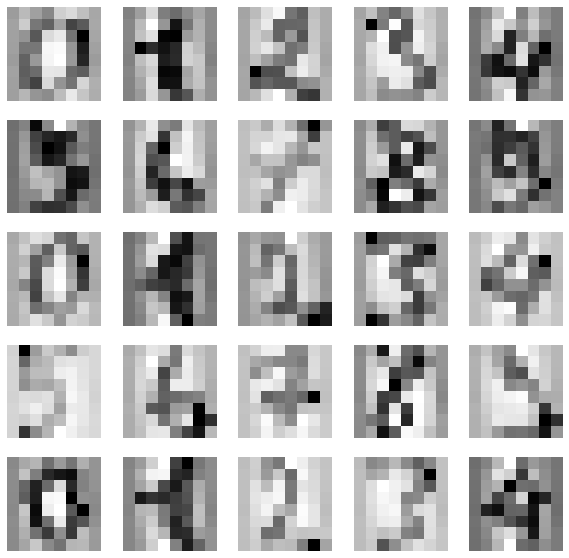

In [5]:
plt.figure(figsize= (10, 10))    
for ii in np.arange(25):
    plt.subplot(5, 5, ii+1)
    plt.imshow(np.reshape(X[ii,:],(8,8)), cmap='Greys',interpolation='nearest')
    plt.axis('off')
plt.show()

You might find [this webpage](http://scikit-learn.org/stable/tutorial/basic/tutorial.html) helpful. 

### Task 1.1: Classification with Support Vector Machines (SVM)

1. Split the data into a training and test set using the command 
```
train_test_split(X, y, random_state=1, test_size=0.8)
```
+ Use SVM with an `rbf` kernel and parameter `C=100` to build a classifier using the *training dataset*.
+ Using the *test dataset*, evaluate the accuracy of the model. Again using the *test dataset*, compute the confusion matrix. What is the most common mistake that the classifier makes? 
+ Print all of these misclassified digits as images. 
+ Using the 'cross_val_score' function, evaluate the accuracy of the SVM for 100 different values of the parameter C between 1 and 500. What is the best value? 
+ Try to train and test the algorithm on the raw (non-scaled) data. What's your accuracy score?

Model Testing
Misclassified digit Images: 


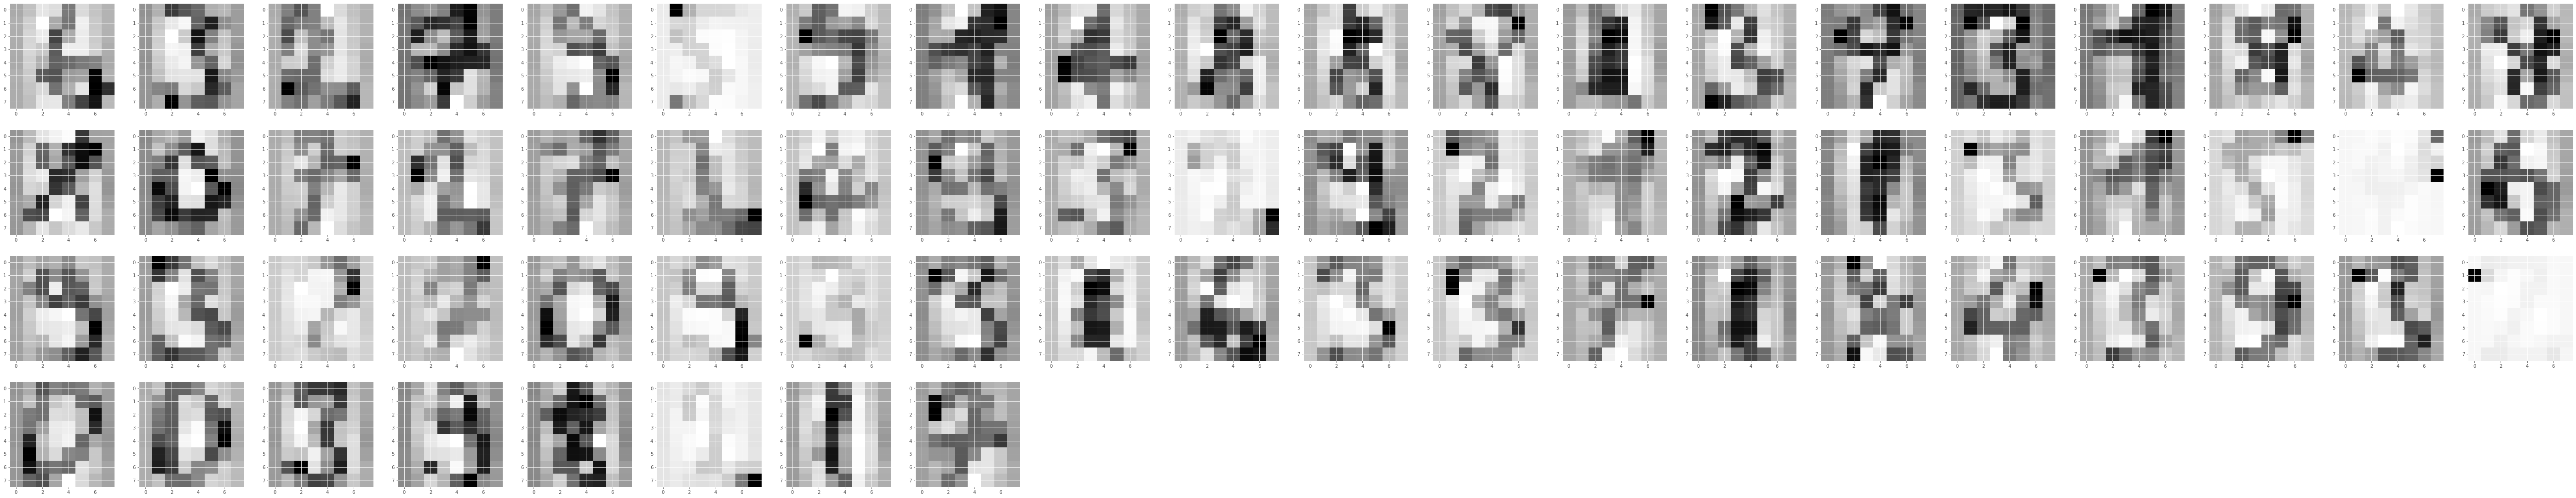

Confusion Matrix:
 [[130   0   0   0   0   0   0   0   0   0]
 [  0 140   4   0   0   0   0   1   4   0]
 [  0   1 134   0   0   0   0   2   5   0]
 [  0   0   3 136   0   0   0   3   4   1]
 [  0   0   0   0 140   0   0  12   0   0]
 [  0   0   0   0   0 141   1   0   1   4]
 [  0   1   0   0   0   0 144   0   1   0]
 [  0   0   0   0   0   0   0 139   0   1]
 [  0   4   0   1   0   1   0   1 126   0]
 [  0   2   0   2   0   3   1   2   2 140]]
Accuracy =  0.952712100139082
The best value for C is:  4
Accuracy:  [0.96944444 0.95       0.95821727 0.95264624 0.94428969]
Training with Raw Data...
Confusion Matrix:
 [[51  7  8  8  4  3 12  6 14 17]
 [15 29  9  6 24  3 18 16 24  5]
 [14 11 56 22  2  1  3 12 12  9]
 [13  5 26 32  1 20  2 17 22  9]
 [13 13  0  0 78  0 39  8  1  0]
 [ 4  4  4 13  0 64  1 32 19  6]
 [19 15  0  1 40  0 46  4 13  8]
 [ 7  0  9 22  0 24  5 60  5  8]
 [29  8 11  9  3  9 11 15 29  9]
 [18 12 17 23  1 10  5 19 36 11]]
Accuracy =  0.31710709318497915


In [6]:
import random
data = train_test_split(X, y, random_state=1, test_size=0.8)
trainedModel = svm.SVC(kernel='rbf', gamma='auto', C=100)

#Train,test, plot misses, and calculate consfusion matrix
print('Model Testing')
trainedModel.fit(data[0],data[2])
print("Misclassified digit Images: ")
y_pred = trainedModel.predict(data[1])
plt.figure(figsize=(100,100))
plotindex = 1
for i in range(y_pred.size):
    if(y_pred[i] != data[3][i]):
        plt.subplot(20,20, plotindex)
        plotindex += 1
        plt.imshow(np.reshape(X[i,:], (8,8)),cmap='Greys', interpolation='none')
plt.show()
print('Confusion Matrix:\n', metrics.confusion_matrix(y_true= data[3], y_pred= y_pred))
print('Accuracy = ', metrics.accuracy_score(y_true = data[3], y_pred= y_pred))


#find the best value for C
best_c = 0;
loopinit= True;
sum_array = 0;
accuracyArray = [];
for C in [random.randrange(1, 500, 3) for _ in range(100)]:
    if(loopinit):
        best_c = C
        accuracyArray = cross_val_score(estimator= svm.SVC(kernel='rbf', gamma='auto', C=C), X=X, y=y, cv=5, scoring='accuracy')
        sum_accuracy = accuracyArray.sum()
        loopinit = False
        continue

    iterationModelAccuracy = cross_val_score(estimator= svm.SVC(kernel='rbf', gamma='auto', C=C), X=X, y=y, cv=5, scoring='accuracy')
    if(iterationModelAccuracy.sum() > sum_accuracy):
        best_c = C
        sum_accuracy = iterationModelAccuracy.sum()
        accuracyArray = iterationModelAccuracy
print('The best value for C is: ', best_c)
print('Accuracy: ', accuracyArray)


# Traning with raw data
print("Training with Raw Data...")
data = train_test_split([x[0] for x in digits.images], y, random_state=1, test_size=0.8)
trainedModel.fit(data[0],data[2])
y_pred = trainedModel.predict(data[1])
print('Confusion Matrix:\n', metrics.confusion_matrix(y_true= data[3], y_pred= y_pred))
print('Accuracy = ', metrics.accuracy_score(y_true = data[3], y_pred= y_pred))



**Your Interpretation**: See the above print out for the results of the analysis. Note values for the best C were chosen randomly and result in different values.

### Task 1.2: Prediction with k-nearest neighbors
Repeat task 1.1 using k-nearest neighbors (k-NN). In part 1, use k=10. In part 5, find the best value of k. 

Misclassified digit Images: 


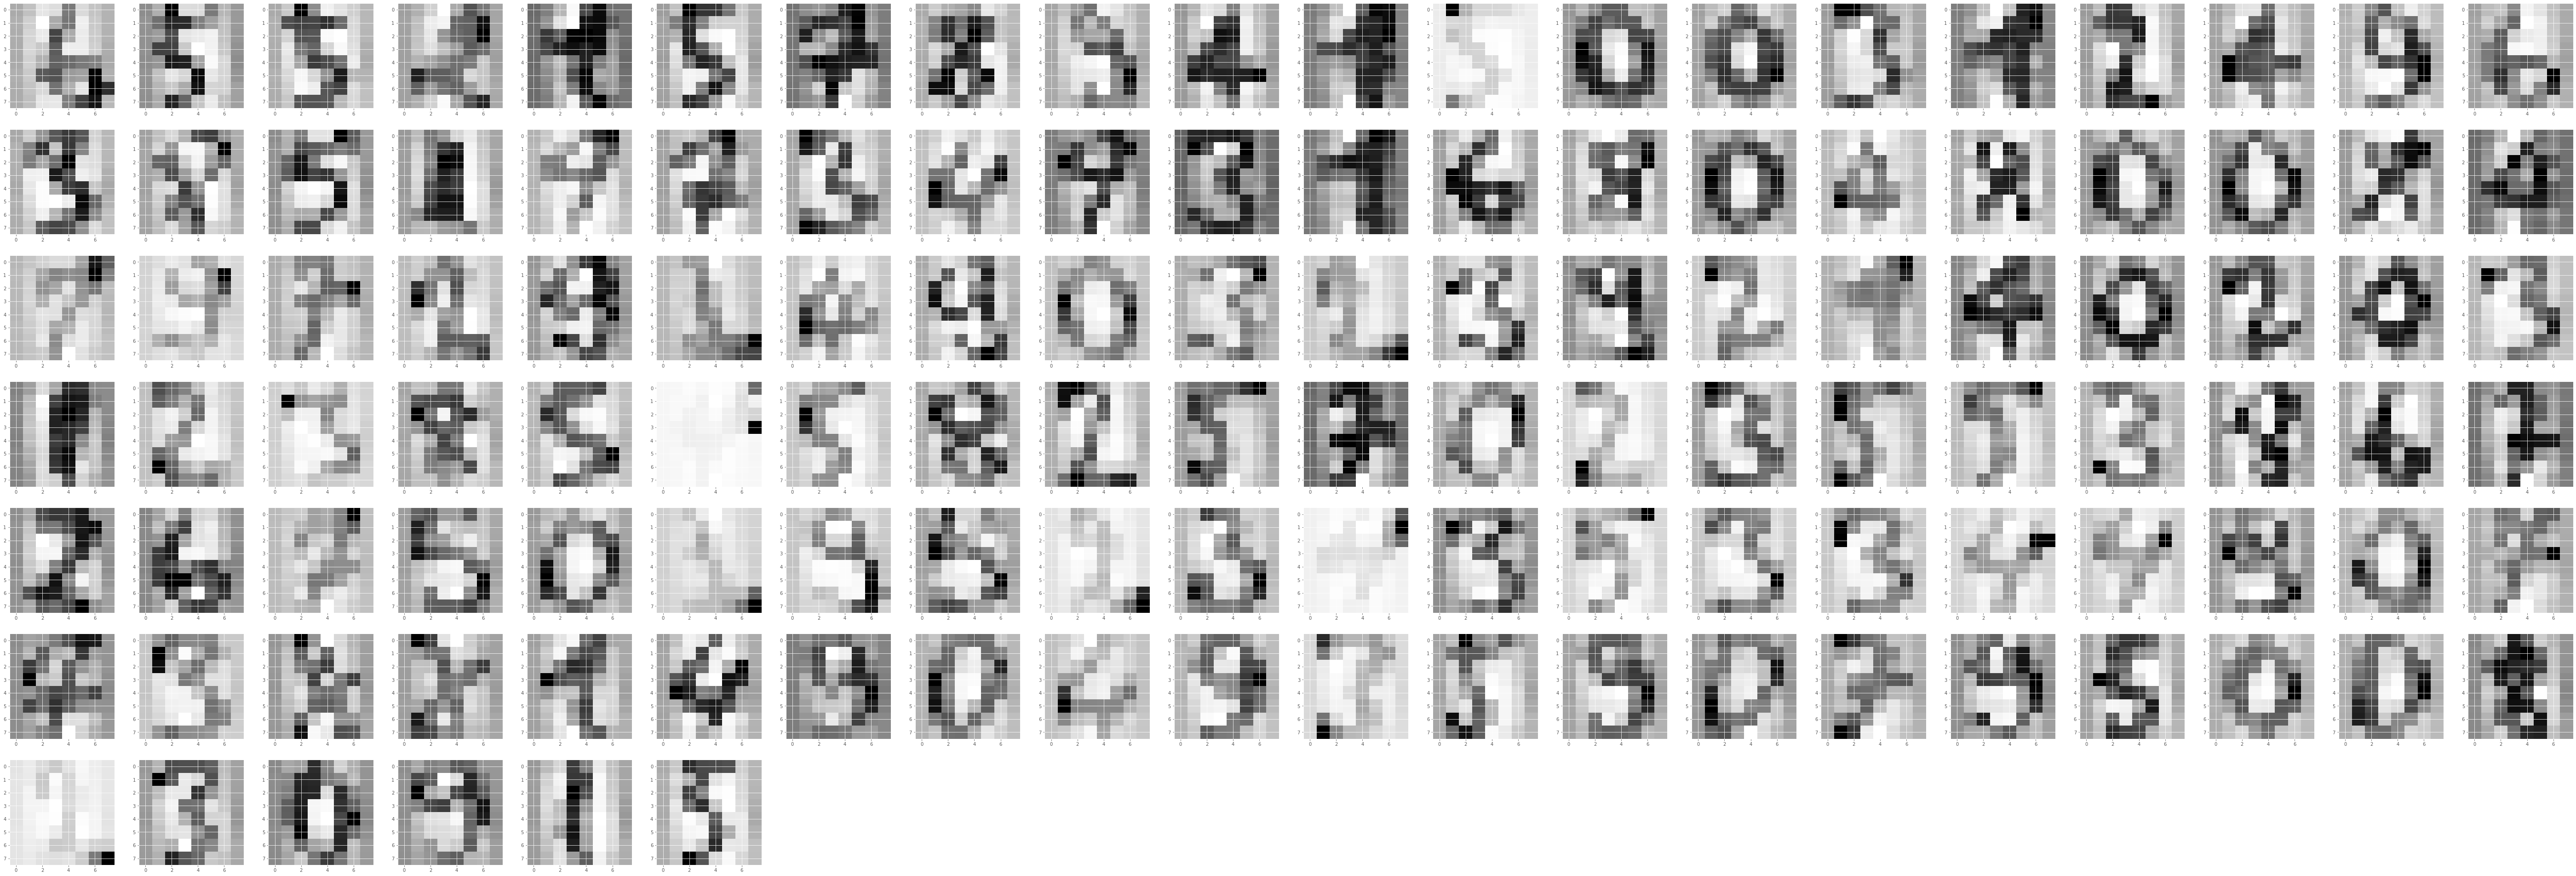

Confusion Matrix:
 [[130   0   0   0   0   0   0   0   0   0]
 [  0 137  11   0   0   0   0   0   1   0]
 [  2   4 123   2   0   0   0   2   9   0]
 [  1   0   1 133   0   1   0   6   4   1]
 [  0   0   0   0 147   0   0   4   1   0]
 [  1   1   0   2   1 136   1   0   0   5]
 [  0   2   0   0   0   0 143   0   1   0]
 [  0   0   0   0   0   0   0 139   1   0]
 [  0   9   1   6   0   0   0   1 115   1]
 [  5  10   0   5   1   3   2   9   8 109]]
Accuracy =  0.9123783031988874
The best value for k is:  4
Accuracy:  [0.93055556 0.93611111 0.95821727 0.96935933 0.93036212]
Training with Raw Data...
Confusion Matrix:
 [[65  3 10  8  3  1 19  0 15  6]
 [30 41 16  4 16  1 20  4 16  1]
 [21  7 80 18  1  0  2  2  7  4]
 [18  0 25 59  1 18  3  8 10  5]
 [21  7  1  0 80  0 43  0  0  0]
 [ 4  2  8 31  0 74  1 17  9  1]
 [32 11  3  0 26  0 69  0  5  0]
 [17  2 16 21  0 22  1 57  4  0]
 [43  9 15 16  2  6  8  8 24  2]
 [29 20 27 29  1  3  1 10 25  7]]
Accuracy =  0.3866481223922114


In [7]:
data = train_test_split(X, y, random_state=1, test_size=0.8)
trainedModel = KNeighborsClassifier(10)

#Train,test, plot misses, and calculate consfusion matrix
trainedModel.fit(data[0],data[2])
print("Misclassified digit Images: ")
y_pred = trainedModel.predict(data[1])
plt.figure(figsize=(100,100))
plotindex = 1
for i in range(y_pred.size):
    if(y_pred[i] != data[3][i]):
        plt.subplot(20,20, plotindex)
        plotindex += 1
        plt.imshow(np.reshape(X[i,:], (8,8)),cmap='Greys', interpolation='none')
plt.show()
print('Confusion Matrix:\n', metrics.confusion_matrix(y_true= data[3], y_pred= y_pred))
print('Accuracy = ', metrics.accuracy_score(y_true = data[3], y_pred= y_pred))

#finding the best value for k
best_k = 0;
loopinit= True;
sum_array = 0;
accuracyArray = [];
for K in [random.randrange(1, 500, 3) for _ in range(100)]:
    if(loopinit):
        best_k = K
        accuracyArray = cross_val_score(estimator=KNeighborsClassifier(K) , X=X, y=y, cv=5, scoring='accuracy')
        sum_accuracy = accuracyArray.sum()
        loopinit = False
        continue

    iterationModelAccuracy = cross_val_score(estimator= KNeighborsClassifier(K), X=X, y=y, cv=5, scoring='accuracy')
    if(iterationModelAccuracy.sum() > sum_accuracy):
        best_k = K
        sum_accuracy = iterationModelAccuracy.sum()
        accuracyArray = iterationModelAccuracy
print('The best value for k is: ', best_k)
print('Accuracy: ', accuracyArray)

# Traning with raw data
print("Training with Raw Data...")
data = train_test_split([x[0] for x in digits.images], y, random_state=1, test_size=0.8)
trainedModel.fit(data[0],data[2])
y_pred = trainedModel.predict(data[1])
print('Confusion Matrix:\n', metrics.confusion_matrix(y_true= data[3], y_pred= y_pred))
print('Accuracy = ', metrics.accuracy_score(y_true = data[3], y_pred= y_pred))

**Your Interpretation**: See the above print out for the results of the analysis. Note values for the best K were chosen randomly and result in different values.

# Part 2: Popularity of online news

For this problem, you will use classification tools to predict the popularity of online news based on attributes such as the length of the article, the number of images, the day of the week that the article was published, and some variables related to the content of the article. You can learn details about the datasetat the
[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity). 
This dataset was first used in the following conference paper: 

K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. *Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence* (2015).

The dataset contains variables describing 39,644 articles published between January 7, 2013 and Januyary 7, 2015 on the news website, [Mashable](http://mashable.com/). 
There are 61 variables associated with each article. Of these, 58 are *predictor* variables, 2 are variables that we will not use (url and timedelta), and finally the number of shares of each article. The number of shares is what we will use to define whether or not the article was *popular*, which is what we will try to predict. You should read about the predictor variables in the file *OnlineNewsPopularity.names*. Further details about the collection and processing of the articles can be found in the conference paper. 


### Task 2.1 Import the data 
* Use the pandas.read_csv() function to import the dataset.
* To use [scikit-learn](http://scikit-learn.org), we'll need to save the data as a numpy array. Use the *DataFrame.values()* method to export the predictor variables as a numpy array called *X* this array should not include our target variable (the number of shares). We don't need the url and timedelta, so let's drop these columns. 
* Export the number of shares as a separate numpy array, called *shares*. We'll define an article to be popular if it received more shares than the median number of shares. Create a binary numpy array, *y*, which indicates whether or not each article is popular.

In [8]:
# Read In/Edit the data frame...
dataframe = pd.read_csv('OnlineNewsPopularity.csv', skipinitialspace=True)
del dataframe['url']
del dataframe['timedelta']
y = dataframe['shares']
del dataframe['shares']
X = scale(dataframe.to_numpy())

### Task 2.2 Exploratory data analysis 

First check to see if the values are reasonable. What are the min, median, and maximum number of shares? 

In [9]:
y.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

### Task 2.3 Classification using k-NN

Develop a k-NN classification model for the data. Use cross validation to choose the best value of k. What is the best accuracy you can obtain on the test data? 

In [10]:
data = train_test_split(X, y, random_state=1, test_size=0.8)
#finding the best value for k
conMat = []
bestaccuray = 0
best_k  = 0
for K in [25,50,75,100]:
    print(K)
    estimator = KNeighborsClassifier(K)
    estimator.fit(data[0],data[2])
    y_pred = estimator.predict(data[1])
    currentaccuray = metrics.accuracy_score(y_true = data[3], y_pred= y_pred)
    if(currentaccuray> bestaccuray):
        conMat = metrics.confusion_matrix(y_true= data[3], y_pred= y_pred)
        bestaccuray = currentaccuray
        best_k = K
print("Best K:", best_k)
print("Confusion Matrix:\n", conMat)
print("Accuracy: ", bestaccuray) 

25
50
75
100
Best K: 100
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy:  0.05151973767183756


**Interpretation:** Using a k of 500, this method can only obtain an accuracy of 0.05 so the KNN method is a poor classifier for this dataset

### Task 2.4 Classification using SVM

Develop a support vector machine classification model for the data. 
 
 * SVM is computationally expensive, so start by using only a fraction of the data, say 5,000 articles. 
 * Experiment with different Cs. Which is the best value for C?

Note that it takes multiple minutes per value of C to run on the whole dataset!

In [11]:
data = train_test_split(X, y, random_state=1, test_size=0.8)
#finding the best value for C
conMat = []
bestaccuray = 0
best_c = 0
for C in [25,50,75,100]:
    print(C)
    estimator = svm.SVC(kernel='rbf', gamma='auto', C=C)
    estimator.fit(data[0],data[2])
    y_pred = estimator.predict(data[1])
    currentaccuray = metrics.accuracy_score(y_true = data[3], y_pred= y_pred)
    if(currentaccuray > bestaccuray):
        conMat = metrics.confusion_matrix(y_true= data[3], y_pred= y_pred)
        bestaccuray = currentaccuray
        best_c = C
print("Best C:", best_c)
print("Confusion Matrix:\n", conMat)
print("Accuracy: ", bestaccuray) 

25


### Task 2.5 Classification using decision trees

Develop a decision tree classification model for the data. 

Use cross validation to choose good values of the max tree depth (*max_depth*) and minimum samples split (*min_samples_split*). 

In [ ]:
data = train_test_split(X, y, random_state=1, test_size=0.8)
#finding the best value for C
conMat = []
bestaccuray = 0
best_depth = 0
best_split = 0
for Depth in [25,50,75,100]:
    for Split in [2,4,8,16]:
        print("Depth: ", Depth, " Split: ", Split)
        estimator = DecisionTreeClassifier( max_depth=Depth, min_samples_split=Split)
        estimator.fit(data[0],data[2])
        y_pred = estimator.predict(data[1])
        currentaccuray = metrics.accuracy_score(y_true = data[3], y_pred= y_pred)
        if(currentaccuray > bestaccuray):
            conMat = metrics.confusion_matrix(y_true= data[3], y_pred= y_pred)
            bestaccuray = currentaccuray
            best_depth = Depth
            best_split = Split
print("Best Depth: ", best_depth, "Best Split: ", best_split)
print("Confusion Matrix:\n", conMat)
print("Accuracy: ", bestaccuray) 

### Task 2.6 Describe your findings
1. Which method (k-NN, SVM, Decision Tree) worked best?
+ How did different parameters influence the accuracy?
+ Which model is easiest do interpret?
+ How would you interpret your results?


**Your Solution:** The k-NN Tree was the best method. See the above analysis for the best parameter selection. k-NN is the best model for them and is a bit easier to interpret conceptualy. The results seem inaccurate. They are very low in accuracy which seems very odd...